# AI351_Lab2_2021389
## Apply Feature selection techniques on preprocessed Data from Lab 01.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tripadvisor_european_restaurants(preprocessed).csv')
df

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,0,1354,235,0,9,36,255,168,987,766,...,2,0,0,0,0,5,6,5,9,24
1,1,1815,235,0,9,36,255,564,986,781,...,2,2,1,0,0,8,8,8,9,24
2,2,82,96,0,3,10,223,836,1052,848,...,3,1,0,0,0,8,8,8,9,24
3,3,1778,217,0,9,15,113,2163,922,984,...,1,0,0,0,0,6,6,6,9,24
4,4,2369,257,0,10,7,256,2837,442,1928,...,4,7,0,0,0,6,6,6,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1710,273,0,10,40,296,936,158,2115,...,6,2,0,0,2,3,4,3,4,24
2996,2996,1453,273,0,10,40,296,786,146,2129,...,21,15,6,3,13,4,4,3,9,24
2997,2997,1550,273,0,10,40,296,972,145,2112,...,1,0,0,0,0,8,8,8,9,24
2998,2998,1466,273,0,10,40,296,1347,140,2104,...,2,2,0,0,0,5,6,5,8,24


In [3]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,0,1354,235,0,9,36,255,168,987,766,...,2,0,0,0,0,5,6,5,9,24
1,1,1815,235,0,9,36,255,564,986,781,...,2,2,1,0,0,8,8,8,9,24
2,2,82,96,0,3,10,223,836,1052,848,...,3,1,0,0,0,8,8,8,9,24
3,3,1778,217,0,9,15,113,2163,922,984,...,1,0,0,0,0,6,6,6,9,24
4,4,2369,257,0,10,7,256,2837,442,1928,...,4,7,0,0,0,6,6,6,9,24


### Dividing data into X and Y parameters where Y contains target column (avg_rating)

In [4]:
X = df.drop('avg_rating',axis=1)
y = df['avg_rating']

### Further dividing data into training and test data with 70-30 ratio.

## Applying Feature Selection Techniques here, imported from sklear.feature_selection.
1. VarianceThreshold

In [5]:
from sklearn.feature_selection import VarianceThreshold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1

,Feature,Variance
3,country,0.000000
23,gluten_free,0.012692
22,vegan_options,0.029100
21,vegetarian_friendly,0.115556
10,claimed,0.250944
29,default_language,0.355234
15,price_level,0.975166
25,open_days_per_week,1.416013
40,keywords,1.675139
39,atmosphere,2.701396


## Applying techniques and visualizing where necessary.
2. SelectKBest, f_regression

Feature 0 : 2.426
Feature 1 : 4.674
Feature 2 : 0.505
Feature 3 : 0.0
Feature 4 : 0.039
Feature 5 : 17.801
Feature 6 : 0.251
Feature 7 : 11.757
Feature 8 : 19.323
Feature 9 : 0.057
Feature 10 : 0.058
Feature 11 : 19.632
Feature 12 : 24.56
Feature 13 : 8.875
Feature 14 : 9.874
Feature 15 : 36.157
Feature 16 : 20.762
Feature 17 : 25.162
Feature 18 : 6.727
Feature 19 : 16.093
Feature 20 : 27.965
Feature 21 : 16.002
Feature 22 : 9.186
Feature 23 : 4.278
Feature 24 : 18.479
Feature 25 : 28.58
Feature 26 : 17.77
Feature 27 : 1.401
Feature 28 : 339.766
Feature 29 : 242.25
Feature 30 : 405.523
Feature 31 : 694.099
Feature 32 : 442.705
Feature 33 : 394.324
Feature 34 : 377.889
Feature 35 : 284.012
Feature 36 : 473.963
Feature 37 : 460.77
Feature 38 : 384.527
Feature 39 : 81.996
Feature 40 : 1.878



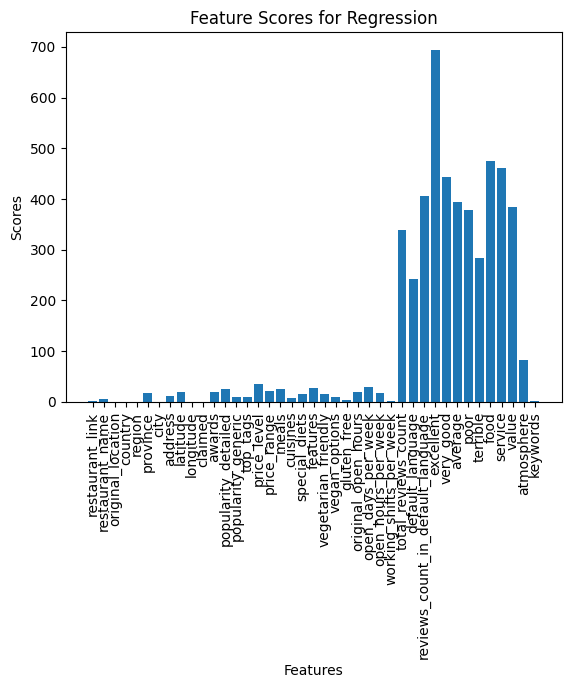

In [6]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X_train and y_train are your training data for regression

Kbest_reg = SelectKBest(score_func=f_regression, k=6)   # score_func=f_regression for regression problem
Kbest_reg.fit(X_train, y_train)

# Print scores for the features
for i in range(len(Kbest_reg.scores_)):
    print(f'Feature {i} : {round(Kbest_reg.scores_[i], 3)}')

print()

# Plot the feature scores
plt.bar([X_train.columns[i] for i in range(len(Kbest_reg.scores_))], Kbest_reg.scores_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores for Regression')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

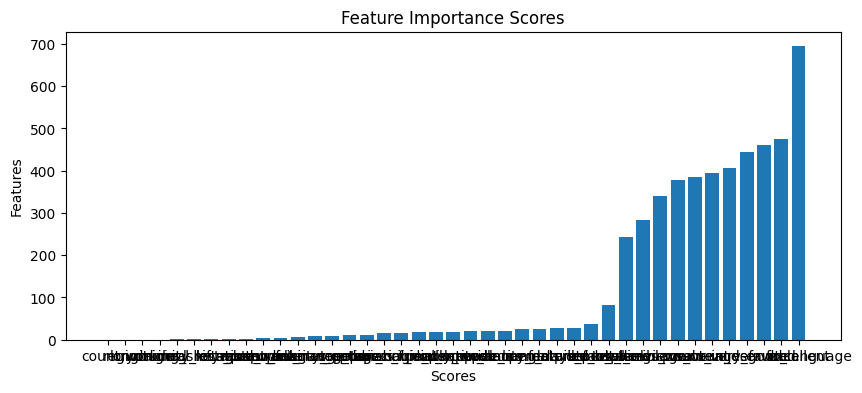

In [7]:
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_reg.scores_))],Kbest_reg.scores_)),key=lambda x:x[1])

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
plt.bar(features, scores)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.savefig('Feature score for Regression.pdf', dpi = 300,format = "pdf")
plt.show()

In [8]:
# transform training set , but we can pick by ourself
X_train_classif = Kbest_reg.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_reg.transform(X_test)

X_train.shape: (2100, 41)

X_train_selected.shape: (2100, 6)



3. LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

#In this example, by using only 6 features of the dataset, we got not better score than by using whole features.

Score with all features: 0.5733
Score with only selected features: 0.5089


4. SelectKBest, mutual_info_regression

Feature 0 : 0.1
Feature 1 : 0.09
Feature 2 : 0.052
Feature 3 : 0.001
Feature 4 : 0.02
Feature 5 : 0.059
Feature 6 : 0.051
Feature 7 : 0.052
Feature 8 : 0.067
Feature 9 : 0.063
Feature 10 : 0.035
Feature 11 : 0.18
Feature 12 : 0.335
Feature 13 : 0.327
Feature 14 : 0.156
Feature 15 : 0.068
Feature 16 : 0.079
Feature 17 : 0.067
Feature 18 : 0.112
Feature 19 : 0.035
Feature 20 : 0.071
Feature 21 : 0.036
Feature 22 : 0.0
Feature 23 : 0.0
Feature 24 : 0.067
Feature 25 : 0.078
Feature 26 : 0.063
Feature 27 : 0.069
Feature 28 : 0.315
Feature 29 : 0.278
Feature 30 : 0.271
Feature 31 : 0.325
Feature 32 : 0.288
Feature 33 : 0.304
Feature 34 : 0.276
Feature 35 : 0.315
Feature 36 : 0.554
Feature 37 : 0.497
Feature 38 : 0.437
Feature 39 : 0.16
Feature 40 : 0.0



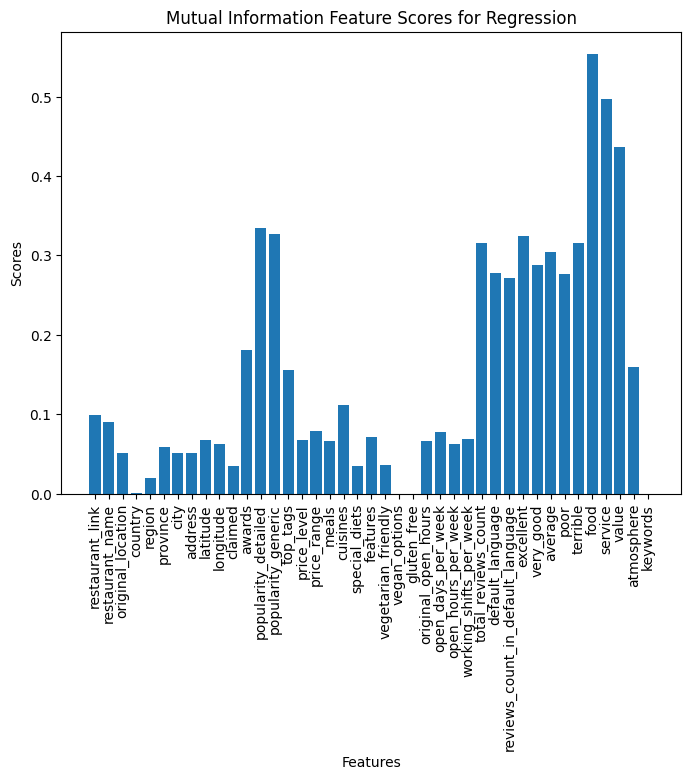

In [10]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Assuming X_train and y_train are your training data for regression

infogain_reg = SelectKBest(score_func=mutual_info_regression, k=6)
infogain_reg.fit(X_train, y_train)

# Print scores for the features
for i in range(len(infogain_reg.scores_)):
    print(f'Feature {i} : {round(infogain_reg.scores_[i], 3)}')

print()

# Plot the feature scores
plt.bar([X_train.columns[i] for i in range(len(infogain_reg.scores_))], infogain_reg.scores_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Mutual Information Feature Scores for Regression')
plt.rcParams["figure.figsize"] = (8, 6)
plt.savefig('Mutual info.pdf', dpi = 300,format = "pdf")
plt.show()

5. SelectPercentile

In [11]:
from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

d:\ML lab\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\ML lab\myenv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectPercentile(percentile=50)

In [12]:
percentile.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [13]:
X_train.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'total_reviews_count',
       'default_language', 'reviews_count_in_default_language', 'excellent',
       'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value',
       'atmosphere', 'keywords'],
      dtype='object')

6. RandomForestRegressor along with SelectFromModel

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
model_based_feature = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42),threshold="median")

model_based_feature.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                threshold='median')

In [15]:
model_based_feature.get_support()

array([ True,  True, False, False, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [16]:
X_train.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'total_reviews_count',
       'default_language', 'reviews_count_in_default_language', 'excellent',
       'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value',
       'atmosphere', 'keywords'],
      dtype='object')

7. Recursive Feature Elimination (RFE)

In [17]:
from sklearn.feature_selection import RFE
rfe_features = RFE(RandomForestRegressor(n_estimators=100, random_state=42),n_features_to_select=6)

rfe_features.fit(X_train, y_train)

rfe_features.get_support()  # how can we know which column is true

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False, False])

In [18]:
df.corr()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
restaurant_link,1.000000,0.007041,-0.060281,NaN,-0.050695,0.095510,0.215772,-0.011363,-0.092768,0.029422,...,0.012804,0.032824,0.053652,0.053145,0.055193,0.023307,0.016938,0.028691,0.008748,-0.018795
restaurant_name,0.007041,1.000000,0.018700,NaN,0.021467,0.026372,-0.031131,-0.065892,0.006781,0.014814,...,-0.033080,-0.021662,-0.021592,-0.020192,-0.011987,-0.042292,-0.047959,-0.043656,0.016359,-0.004109
original_location,-0.060281,0.018700,1.000000,NaN,0.980343,0.053478,0.111296,-0.063932,-0.165963,-0.423718,...,-0.008977,-0.023867,-0.035793,-0.028827,-0.032292,0.018524,0.019754,0.017166,-0.015163,0.034075
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,-0.050695,0.021467,0.980343,NaN,1.000000,0.048590,0.078729,-0.082962,-0.052253,-0.417229,...,0.002029,-0.008212,-0.017614,-0.011373,-0.013296,0.023847,0.022773,0.021205,-0.007414,0.044945
province,0.095510,0.026372,0.053478,NaN,0.048590,1.000000,-0.073070,-0.041089,0.260317,0.114812,...,-0.012113,0.009212,0.008939,0.010258,0.019834,-0.008221,-0.011797,-0.019253,0.014843,0.032712
city,0.215772,-0.031131,0.111296,NaN,0.078729,-0.073070,1.000000,0.085857,-0.146678,-0.039813,...,-0.000861,-0.000369,0.001970,0.002583,0.001230,-0.002280,0.001129,-0.003032,-0.059089,-0.033645
address,-0.011363,-0.065892,-0.063932,NaN,-0.082962,-0.041089,0.085857,1.000000,-0.069800,0.106305,...,-0.007130,-0.004392,-0.011116,-0.011765,-0.014388,-0.041957,-0.051586,-0.044254,-0.005424,-0.035910
latitude,-0.092768,0.006781,-0.165963,NaN,-0.052253,0.260317,-0.146678,-0.069800,1.000000,-0.187907,...,0.010099,0.039076,0.049616,0.041702,0.051452,-0.026556,-0.028388,-0.020170,-0.010434,0.028765
longitude,0.029422,0.014814,-0.423718,NaN,-0.417229,0.114812,-0.039813,0.106305,-0.187907,1.000000,...,0.012595,0.014548,0.015224,0.011241,0.014566,0.025598,0.021808,0.008435,0.029495,0.013306


In [19]:
df_corr = pd.DataFrame(df.corrwith(df['avg_rating']),columns='correlation'.split(','))
# df_corr.style.bar(color='lightgreen',subset=['correlation'])
df_corr

d:\ML lab\myenv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\ML lab\myenv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation
restaurant_link,-0.025045
restaurant_name,-0.042001
original_location,0.007870
country,NaN
region,-0.000322
province,-0.075429
city,0.010588
address,-0.078100
latitude,-0.084958
longitude,0.006259


### Visualising correlation with respect to target column.

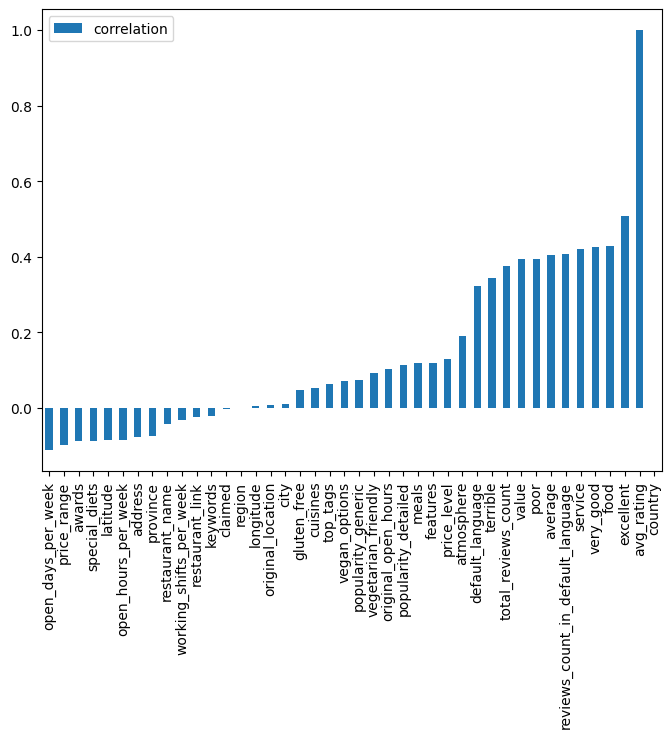

In [31]:
df_corr.sort_values(by=['correlation'],ascending=True).plot(kind='bar')
# Save the plot as a PDF
plt.savefig('corr_plot.pdf')

# Show the plot (optional)
plt.show()

8. mutual_info_regression

In [21]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info  

array([0.09939088, 0.08925359, 0.07670142, 0.01122239, 0.04564625,
       0.04229359, 0.06390112, 0.05271363, 0.06938018, 0.06602156,
       0.006656  , 0.15495933, 0.33582446, 0.32662229, 0.14656569,
       0.06359372, 0.05900737, 0.06423691, 0.11326214, 0.01021687,
       0.11578158, 0.06423813, 0.0147937 , 0.        , 0.05708108,
       0.06282041, 0.05578352, 0.07636207, 0.31897124, 0.23721173,
       0.26130408, 0.3168586 , 0.29563335, 0.2961502 , 0.3042869 ,
       0.31357781, 0.51715772, 0.49661453, 0.45508574, 0.14595304,
       0.00924971])

9. Principal component analysis along with KMeans

In [22]:
from sklearn.decomposition import PCA
from  sklearn.cluster import KMeans

kmeans = KMeans(4)

kmeans.fit(df)

df['clusters'] = kmeans.labels_

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

principalDf

d:\ML lab\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pc1,pc2
0,1774.860863,-1320.958328
1,622.985439,-1101.062000
2,1973.032184,-1055.278960
3,2115.114427,-528.995054
4,2166.227326,530.534440
...,...,...
2995,-1093.187828,1688.490096
2996,-809.205583,1641.845566
2997,-1040.077548,1735.723296
2998,-237.182851,1772.430686


In [23]:
all_data = pd.concat([ df , principalDf], axis = 1)

In [24]:
def visualize_clusters(cluster_column) :
    '''
    Input - column in all_data dataframe which contains cluster no. for the observations
    '''
     ##start code here
    for_x = all_data['pc1']
    for_y = all_data['pc2']
    sns.scatterplot(x=for_x, y=for_y, hue=cluster_column, 
                data=all_data, s=20)
    plt.legend(loc='lower right')
    plt.savefig('PCA clusters.pdf', dpi = 300,format = "pdf")
    ##end code here

d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


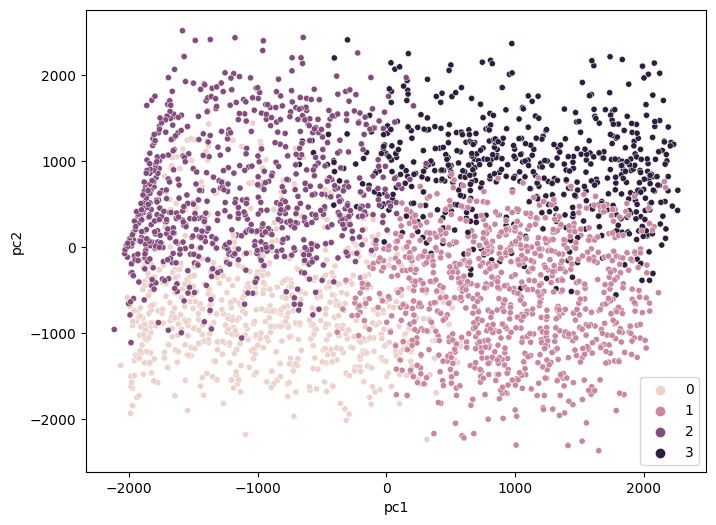

In [25]:
visualize_clusters('clusters')

10. Genetic ALgorithm for Feature selection.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [27]:
data_pcos = pd.read_csv("tripadvisor_european_restaurants(preprocessed).csv")
label_pcos = data_pcos["avg_rating"]

print("CoverType dataset:\n",data_pcos.shape[0],"Records\n",data_pcos.shape[1],"Features")

CoverType dataset:
 3000 Records
 42 Features


In [28]:
!pip install sklearn-genetic

In [29]:
import random
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

if __name__ == "__main__":

    # Set seed for reproducibility
    random.seed(42)
    np.random.seed(42)

    iris = pd.read_csv('my data.csv')
    iris = iris.iloc[:, :55] # Select the first 54 columns

    y = iris['Cover_Type'] # Set the last column as the target column
    X = iris.drop(['Cover_Type'], axis=1)

    # Some noisy data not correlated
    E = np.random.uniform(0, 0.1, size=(len(X), 20))
    X = np.hstack((X, E))

    estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

    selector = GeneticSelectionCV(
        estimator,
        cv=5,
        verbose=1,
        scoring="accuracy",
        max_features=5,
        n_population=50,
        crossover_proba=0.5,
        mutation_proba=0.2,
        n_generations=40,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )
    selector = selector.fit(X, y)

    print(selector.support_)

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (d:\ML lab\myenv\Lib\site-packages\sklearn\utils\metaestimators.py)